In [1]:
# pip install xgboost

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xgboost

# https://archive.ics.uci.edu/dataset/938/regensburg+pediatric+appendicitis

df = pd.read_excel('data/app_data.xlsx')

cond1 = df['Diagnosis'].notna()
cond2 = df['Body_Temperature']>30

df['has_appendicitis'] = (df['Diagnosis']=="appendicitis").astype('int')

df = df[cond1&cond2].reset_index(drop=True)

In [3]:
df.shape

(774, 59)

# Data description

## Pediatric Appendicitis

Data corresponds to pediatric patients with suspected appendicitis admitted with abdominal pain to Children’s Hospital St. Hedwig in Regensburg, Germany, between 2016 and 2021. 

The dataset includes ultrasound images, laboratory, physical examination, scoring results and ultrasonographic findings extracted manually by the experts, and the target variable is diagnosis, to predict if the patient has appendicitis or not. Other target variables such as Severity or Management are excluded.

The original source can be found in this link
https://archive.ics.uci.edu/dataset/938/regensburg+pediatric+appendicitis



In [4]:
df.columns

Index(['Age', 'BMI', 'Sex', 'Height', 'Weight', 'Length_of_Stay', 'Management',
       'Severity', 'Diagnosis_Presumptive', 'Diagnosis', 'Alvarado_Score',
       'Paedriatic_Appendicitis_Score', 'Appendix_on_US', 'Appendix_Diameter',
       'Migratory_Pain', 'Lower_Right_Abd_Pain',
       'Contralateral_Rebound_Tenderness', 'Coughing_Pain', 'Nausea',
       'Loss_of_Appetite', 'Body_Temperature', 'WBC_Count',
       'Neutrophil_Percentage', 'Segmented_Neutrophils', 'Neutrophilia',
       'RBC_Count', 'Hemoglobin', 'RDW', 'Thrombocyte_Count',
       'Ketones_in_Urine', 'RBC_in_Urine', 'WBC_in_Urine', 'CRP', 'Dysuria',
       'Stool', 'Peritonitis', 'Psoas_Sign', 'Ipsilateral_Rebound_Tenderness',
       'US_Performed', 'US_Number', 'Free_Fluids', 'Appendix_Wall_Layers',
       'Target_Sign', 'Appendicolith', 'Perfusion', 'Perforation',
       'Surrounding_Tissue_Reaction', 'Appendicular_Abscess',
       'Abscess_Location', 'Pathological_Lymph_Nodes', 'Lymph_Nodes_Location',
       'Bowel

In [5]:
(df['has_appendicitis'].value_counts()/len(df)*100).round(2)

has_appendicitis
1    59.3
0    40.7
Name: count, dtype: float64

In [6]:
def count_nan(x):
    n_nan =  x.isna().sum()
    return {'n_nan': n_nan, 'total': len(x), 'pct_nan': round(n_nan/len(x), 4)}

df.groupby(['Diagnosis']).agg({'Appendix_Diameter': ['describe', count_nan]})

Appendix_Diameter                                            \
                         describe                                             
                            count      mean       std  min  25%   50%   75%   
Diagnosis                                                                     
appendicitis                370.0  8.698919  2.182214  4.4  7.0  8.25  10.0   
no appendicitis             127.0  5.037008  1.171541  2.7  4.0  5.00   5.5   

                                                                        
                                                             count_nan  
                  max                                Appendix_Diameter  
Diagnosis                                                               
appendicitis     17.0   {'n_nan': 89, 'total': 459, 'pct_nan': 0.1939}  
no appendicitis   9.5  {'n_nan': 188, 'total': 315, 'pct_nan': 0.5968}

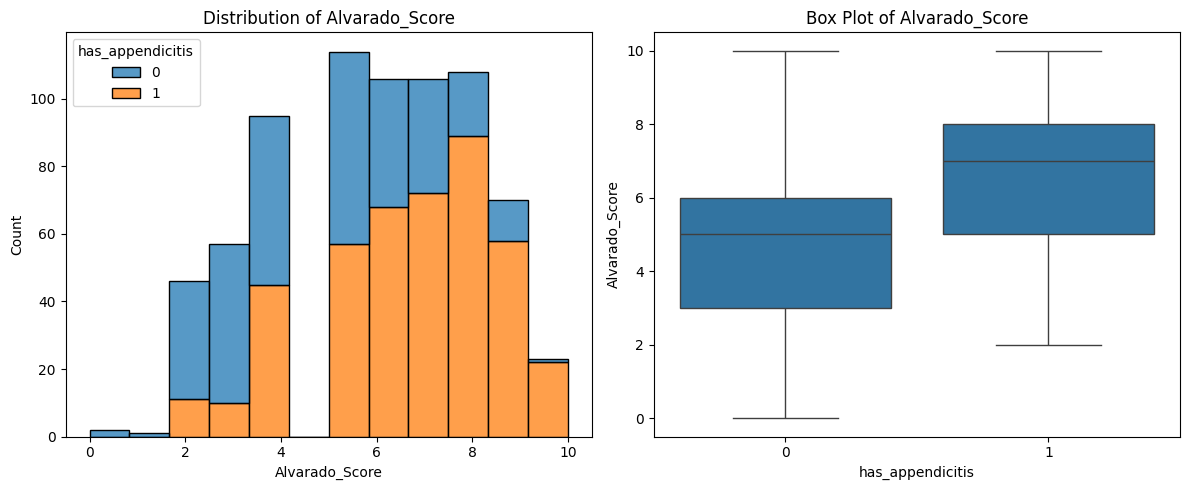

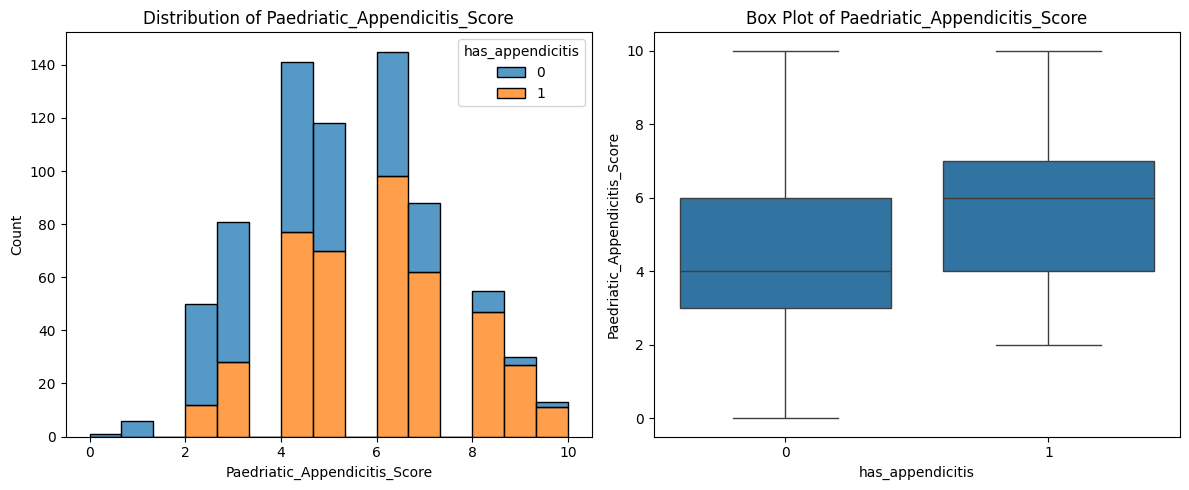

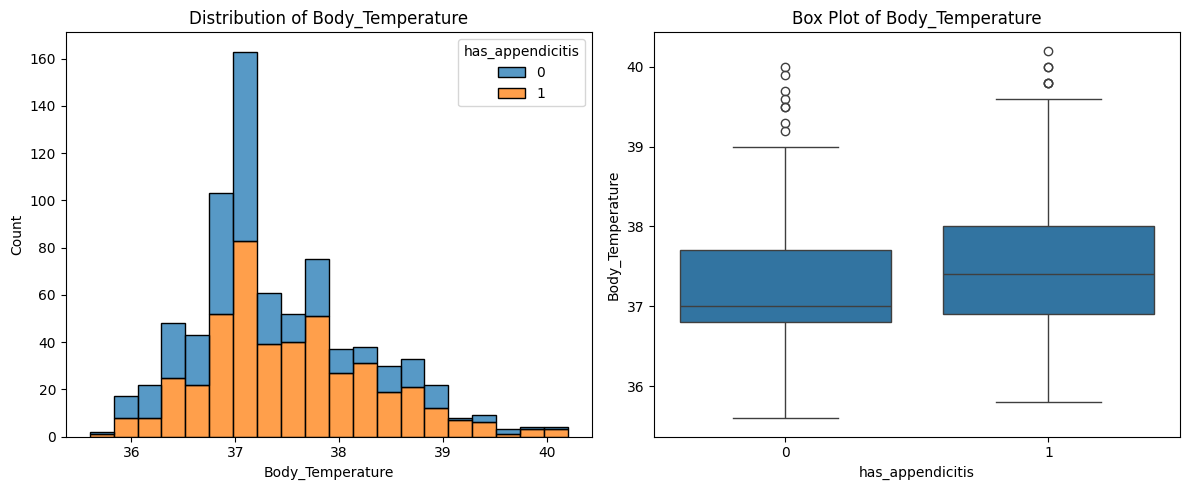

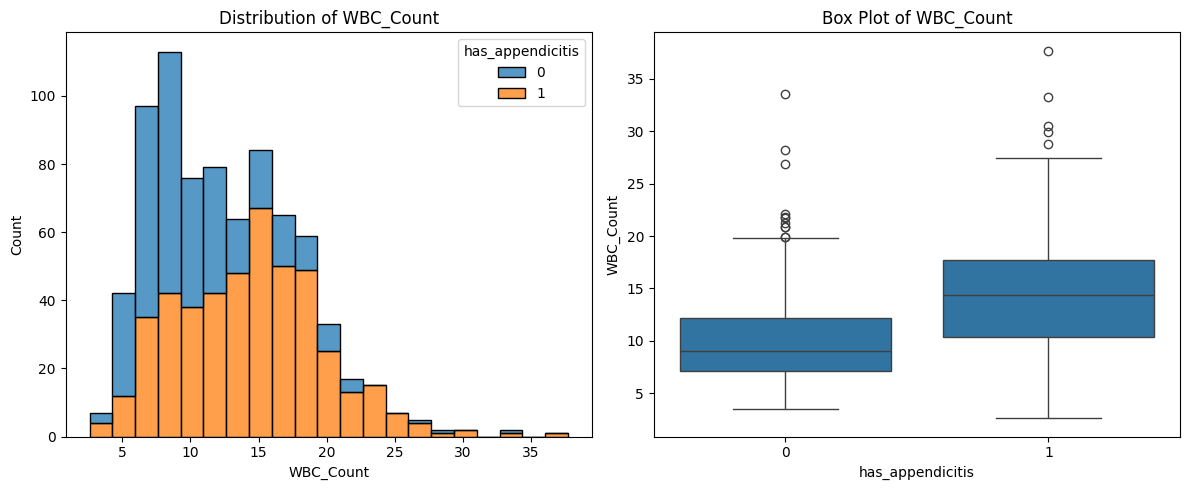

In [7]:
from scipy import stats
import seaborn as sns

key_indicators = ['Alvarado_Score', 'Paedriatic_Appendicitis_Score', 'Body_Temperature', 'WBC_Count' ] #'CRP'

for indicator in key_indicators:
    plt.figure(figsize=(12, 5))
    
    # Distribution plot
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=indicator, hue='has_appendicitis', multiple="stack")
    plt.title(f'Distribution of {indicator}')
    
    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x='has_appendicitis', y=indicator)
    plt.title(f'Box Plot of {indicator}')
    
    plt.tight_layout()
    plt.show()
    



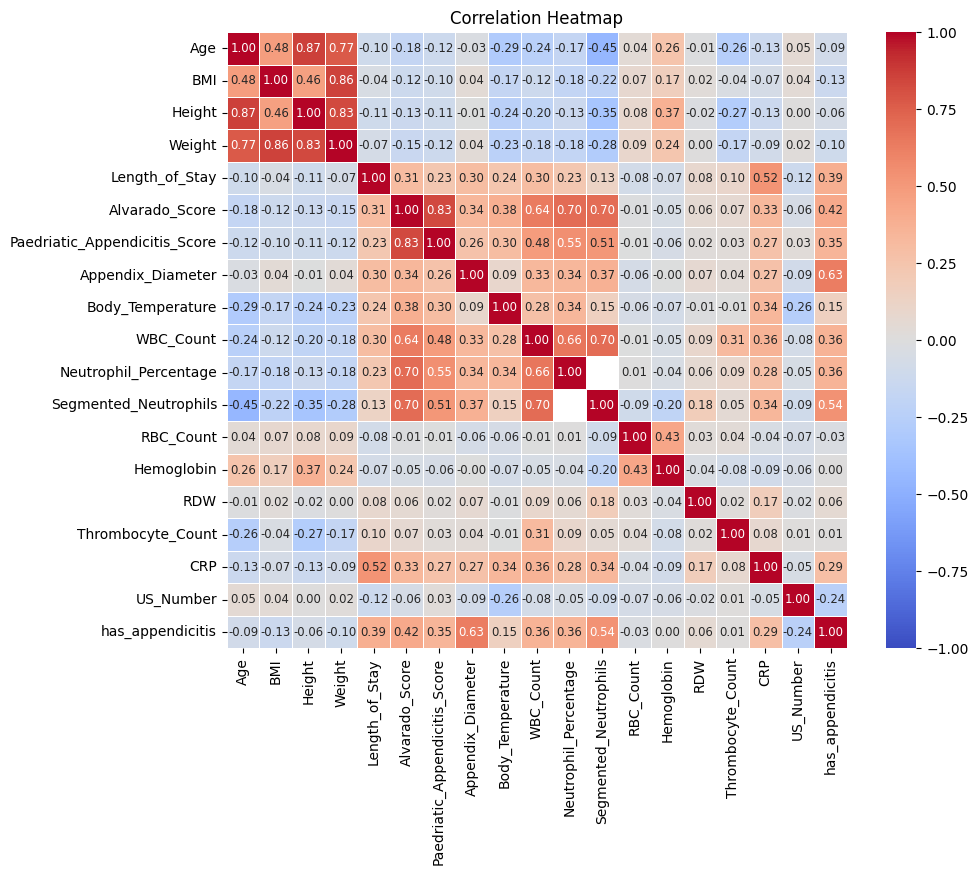

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.select_dtypes([int, float]).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, annot_kws={"size": "small"})

plt.title('Correlation Heatmap')
plt.show()

# Data Specificity

Data type, explanatory statistics, variable transformations, and selection methods.

# Data preparation



In [9]:

df = pd.read_excel('data/app_data.xlsx')

cond1 = df['Diagnosis'].notna()

df = df[cond1].reset_index(drop=True)

In [10]:
import pandas as pd
import numpy as np

def analyze_dataframe(df):
    """
    Analyzes a dataframe and returns a summary of data types and unique values
    """
    # Initialize lists to store column information
    columns = []
    dtypes = []
    unique_values = []
    null_counts = []
    null_pct = []
    
    for column in df.columns:
        # Get basic info
        columns.append(column)
        dtypes.append(str(df[column].dtype))
        null_counts.append(df[column].isnull().sum())
        null_pct.append(df[column].isnull().sum()/len(df))
        
        # Get unique values based on data type
        if pd.api.types.is_numeric_dtype(df[column]):
            if df[column].dtype == bool:
                unique_vals = list(df[column].unique())
            else:
                # For numeric columns, show range
                unique_vals = f"Range: [{df[column].min():.2f} - {df[column].max():.2f}]"
        else:
            # For categorical columns, show top values
            unique_vals = list(df[column].value_counts().head(5).index)
            
        unique_values.append(unique_vals)
    
    # Create summary dataframe
    summary_df = pd.DataFrame({
        'Column': columns,
        'Data Type': dtypes,
        'Null Count': null_counts,
        'Nulls (%)': null_pct,
        'Top Values/Range': unique_values
    })
    
    # Add total rows and memory usage
    print(f"\nTotal Rows: {len(df)}")
    print(f"Total Columns: {len(df.columns)}")
    
    return summary_df

analyze_dataframe(df)



Total Rows: 780
Total Columns: 58


,Column,Data Type,Null Count,Nulls (%),Top Values/Range
0,Age,float64,0,0.000000,Range: [0.00 - 18.36]
1,BMI,float64,26,0.033333,Range: [7.83 - 38.16]
2,Sex,object,1,0.001282,"[male, female]"
3,Height,float64,25,0.032051,Range: [53.00 - 192.00]
4,Weight,float64,2,0.002564,Range: [3.96 - 103.00]
5,Length_of_Stay,float64,3,0.003846,Range: [1.00 - 28.00]
6,Management,object,0,0.000000,"[conservative, primary surgical, secondary sur..."
7,Severity,object,0,0.000000,"[uncomplicated, complicated]"
8,Diagnosis_Presumptive,object,1,0.001282,"[appendicitis, no appendicitis, Gastroenteriti..."
9,Diagnosis,object,0,0.000000,"[appendicitis, no appendicitis]"


In [11]:
missing_pct = df.isna().sum()/len(df)*100
missing_pct[missing_pct > 50].sort_values(ascending=False)

Abscess_Location               98.333333
Gynecological_Findings         96.666667
Conglomerate_of_Bowel_Loops    94.487179
Segmented_Neutrophils          93.076923
Ileus                          92.307692
Perfusion                      91.923077
Enteritis                      91.538462
Appendicolith                  91.153846
Coprostasis                    90.897436
Perforation                    89.615385
Appendicular_Abscess           89.102564
Bowel_Wall_Thickening          87.307692
Lymph_Nodes_Location           84.487179
Target_Sign                    82.307692
Meteorism                      82.051282
Pathological_Lymph_Nodes       73.974359
Appendix_Wall_Layers           72.051282
Surrounding_Tissue_Reaction    67.692308
dtype: float64

In [12]:
# transform target variable
df['has_appendicitis'] = (df['Diagnosis']=="appendicitis").astype('int')

# drop other target variables, we can't use them to predict
df.drop(columns=['Severity', 'Diagnosis', 'Management'], inplace=True)

# drop variables that are calculated based on other parameters present
df.drop(columns=['Paedriatic_Appendicitis_Score', 'Alvarado_Score'], inplace=True)

# 'Diagnosis_Presumptive'
df.drop(columns=['Diagnosis_Presumptive', 'Length_of_Stay'], inplace=True)

# ultrasound
us_variables = ['Appendix_on_US', 'Appendix_Diameter', 'Free_Fluids', 'Appendix_Wall_Layers', 'Target_Sign', 
                'Surrounding_Tissue_Reaction', 'Pathological_Lymph_Nodes','Bowel_Wall_Thickening', 'Coprostasis', 'Meteorism']

# drop variables that are not usually available (>90% nulls)
nulls_treshold = 90
nulls_to_drop = missing_pct[missing_pct > nulls_treshold].index
print(f"The following columns will be dropped due to having {nulls_treshold}% of nulls:", ", ".join(nulls_to_drop))

df.drop(columns=nulls_to_drop, inplace=True)

The following columns will be dropped due to having 90% of nulls: Segmented_Neutrophils, Appendicolith, Perfusion, Abscess_Location, Conglomerate_of_Bowel_Loops, Ileus, Coprostasis, Enteritis, Gynecological_Findings


In [13]:
def get_summary(var, data):
    pct_nan = round(df[var].isna().sum()/len(df)*100, 2)
    return f"{var}: {len(data.unique())} unique values: {df[var].unique()}.  {pct_nan}% null values"


binary_vars = ['Surrounding_Tissue_Reaction',  'Pathological_Lymph_Nodes', 'Dysuria', 'Bowel_Wall_Thickening', 
               'Conglomerate_of_Bowel_Loops',  'Appendix_on_US', 'Migratory_Pain', 'Lower_Right_Abd_Pain',
               'Contralateral_Rebound_Tenderness', 'Coughing_Pain', 'Nausea', 'Loss_of_Appetite',
               # described as categorical, however, they are binary (yes/no) variables
               'Neutrophilia', 'Psoas_Sign', 'Ipsilateral_Rebound_Tenderness', 'US_Performed', 
               'Free_Fluids', 'Target_Sign', 'Ileus', 'Coprostasis', 'Meteorism', 'Enteritis']


binary_vars = [var for var in binary_vars if var in df.columns]

for var in binary_vars:
    print(get_summary(var, df[var]))


import numpy as np

for var in binary_vars:
    if df[var].dtype == 'O':
        df[var] = np.select([df[var]=='yes', df[var]=='no'], [1, 0], default=np.nan)

Surrounding_Tissue_Reaction: 3 unique values: ['yes' nan 'no'].  67.69% null values
Pathological_Lymph_Nodes: 3 unique values: ['yes' nan 'no'].  73.97% null values
Dysuria: 3 unique values: ['no' 'yes' nan].  3.46% null values
Bowel_Wall_Thickening: 3 unique values: [nan 'no' 'yes'].  87.31% null values
Appendix_on_US: 3 unique values: ['yes' 'no' nan].  0.38% null values
Migratory_Pain: 3 unique values: ['no' 'yes' nan].  0.9% null values
Lower_Right_Abd_Pain: 3 unique values: ['yes' 'no' nan].  0.77% null values
Contralateral_Rebound_Tenderness: 3 unique values: ['yes' 'no' nan].  1.67% null values
Coughing_Pain: 3 unique values: ['no' 'yes' nan].  1.79% null values
Nausea: 3 unique values: ['no' 'yes' nan].  0.77% null values
Loss_of_Appetite: 3 unique values: ['yes' 'no' nan].  1.03% null values
Neutrophilia: 3 unique values: ['no' 'yes' nan].  6.15% null values
Psoas_Sign: 3 unique values: ['yes' 'no' nan].  4.49% null values
Ipsilateral_Rebound_Tenderness: 3 unique values: ['no'

In [14]:
df['Sex'] = np.select([df['Sex']=='male', df['Sex']=='female', df['Sex']==np.nan], [1, 0, np.nan], default=np.nan)

In [15]:

# transform categorical variables
#df['Sex'] = df['Sex'].astype('category')

categorical_columns = df.select_dtypes(include=['object']).columns


for var in categorical_columns:
    print(get_summary(var, df[var]))

# Lymph_Nodes_Location, 

Ketones_in_Urine: 5 unique values: ['++' 'no' nan '+++' '+'].  25.38% null values
RBC_in_Urine: 5 unique values: ['+' 'no' nan '++' '+++'].  26.15% null values
WBC_in_Urine: 5 unique values: ['no' '+' nan '+++' '++'].  25.26% null values
Stool: 5 unique values: ['normal' 'constipation' 'diarrhea' nan 'constipation, diarrhea'].  1.92% null values
Peritonitis: 4 unique values: ['no' 'local' 'generalized' nan].  0.9% null values
Appendix_Wall_Layers: 5 unique values: ['intact' nan 'raised' 'upset' 'partially raised'].  72.05% null values
Perforation: 5 unique values: ['no' nan 'suspected' 'yes' 'not excluded'].  89.62% null values
Appendicular_Abscess: 4 unique values: ['no' nan 'suspected' 'yes'].  89.1% null values
Lymph_Nodes_Location: 27 unique values: ['reUB' nan 're UB' 'Ileozökal' 'UB' 're UB ' 'periumbilikal' 'ileocoekal'
 'mesenterial, re UB' 'mesenterial' 're UB, periumbilikal' 're UB  '
 're UB, ileocoecal' 'ileocoecal' 're UB, re MB' 'MB' 're MB' 'inguinal'
 'periappendikulär 

In [16]:
import unicodedata
import re

def clean_text(text):
    """
    Clean and normalize text to handle special characters and symbols
    """
    if pd.isna(text):
        return text
    
    text = str(text) #.lower()
    
    # Standardize plus symbols
    text = text.replace('+++', 'plus_3')
    text = text.replace('++', 'plus_2')
    text = text.replace('+', 'plus_1')
    
    # Standarize no
    if text.lower().strip() in ['no', 'keine',]:
        return 'no'
    
    # Remove special characters
    text = ''.join(char for char in unicodedata.normalize('NFKD', text)
                  if unicodedata.category(char)[0] != 'P' or char in 'äöüß')
      
    # Replace special characters with underscore
    text = re.sub(r'[^a-z0-9]+', '_', text)
    
    # Remove multiple underscores
    text = re.sub(r'_+', '_', text)
    text = text.strip('_')
    
    return text


for column in categorical_columns:
    # First clean the values in the original column
    df[column] = df[column].apply(clean_text)
    
    dummy_df = pd.get_dummies(df[column], prefix=column)

    for col in dummy_df.columns:
        dummy_df[col] = dummy_df[col].fillna(False).astype(bool)
    
    # Concatenate and drop original column
    df = pd.concat([df, dummy_df], axis=1).drop(column, axis=1)


#import pandas as pd

#for col in object_cols:
#  df[col] = df[col].fillna(False).astype(bool)

In [17]:
df.describe()

,Age,BMI,Sex,Height,Weight,Appendix_on_US,Appendix_Diameter,Migratory_Pain,Lower_Right_Abd_Pain,Contralateral_Rebound_Tenderness,...,Ipsilateral_Rebound_Tenderness,US_Performed,US_Number,Free_Fluids,Target_Sign,Surrounding_Tissue_Reaction,Pathological_Lymph_Nodes,Bowel_Wall_Thickening,Meteorism,has_appendicitis
count,780.000000,754.000000,779.000000,755.000000,778.000000,777.000000,498.000000,773.000000,774.000000,767.000000,...,619.000000,777.000000,759.000000,719.000000,138.000000,252.000000,203.000000,99.000000,140.000000,780.000000
mean,11.341863,18.905041,0.517330,147.997616,43.158625,0.648649,7.762651,0.272962,0.947028,0.388527,...,0.061389,0.981982,425.342556,0.431154,0.630435,0.825397,0.758621,0.555556,0.921429,0.593590
std,3.529881,4.387860,0.500021,19.737546,17.397830,0.477700,2.536671,0.445770,0.224122,0.487733,...,0.240237,0.133102,271.722277,0.495582,0.484445,0.380383,0.428978,0.499433,0.270035,0.491478
min,0.000000,7.827983,0.000000,53.000000,3.960000,0.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.198426,15.721375,0.000000,137.000000,29.500000,0.000000,6.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,198.500000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,11.437372,18.044121,1.000000,149.500000,41.300000,1.000000,7.500000,0.000000,1.000000,0.000000,...,0.000000,1.000000,398.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,14.040383,21.185877,1.000000,163.000000,54.000000,1.000000,9.100000,1.000000,1.000000,1.000000,...,0.000000,1.000000,613.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,18.360000,38.156221,1.000000,192.000000,103.000000,1.000000,17.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,992.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
df.head()

,Age,BMI,Sex,Height,Weight,Appendix_on_US,Appendix_Diameter,Migratory_Pain,Lower_Right_Abd_Pain,Contralateral_Rebound_Tenderness,...,Lymph_Nodes_Location_periappendikula_r,Lymph_Nodes_Location_periumbilikal,Lymph_Nodes_Location_re,Lymph_Nodes_Location_re_ileocoecal,Lymph_Nodes_Location_re_periumbilikal,Lymph_Nodes_Location_re_re,Lymph_Nodes_Location_rechter_nter_und_ittelbauch,Lymph_Nodes_Location_rechter_nterbauch,Lymph_Nodes_Location_varialzysten,Lymph_Nodes_Location_ymphadenopathie
0,12.68,16.9,0.0,148.0,37.0,1.0,7.1,0.0,1.0,1.0,...,False,False,True,False,False,False,False,False,False,False
1,14.10,31.9,1.0,147.0,69.5,0.0,NaN,1.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
2,14.14,23.3,0.0,163.0,62.0,0.0,NaN,0.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
3,16.37,20.6,0.0,165.0,56.0,0.0,NaN,1.0,1.0,0.0,...,False,False,True,False,False,False,False,False,False,False
4,11.08,16.9,0.0,163.0,45.0,1.0,7.0,0.0,1.0,1.0,...,False,False,True,False,False,False,False,False,False,False


In [19]:
df['Ketones_in_Urine_no']

0      False
1       True
2       True
3       True
4       True
       ...  
775    False
776    False
777     True
778    False
779     True
Name: Ketones_in_Urine_no, Length: 780, dtype: bool

# Model



RandomForestClassifier
AdaBoostClassifier
XGBClassifier

For comparing these models, we will use the following metrics
- accuracy
- precision
- recall
- F1


In [20]:
classifier_results = dict()

In [21]:
from sklearn.model_selection import train_test_split


target_variable = "has_appendicitis"
FeaturesName = df.columns.drop(target_variable)


X_train, X_test, Y_train, Y_test = train_test_split(
    df[FeaturesName], df[target_variable], test_size=0.20,)




In [22]:
Y_train.value_counts()/len(Y_train)

has_appendicitis
1    0.588141
0    0.411859
Name: count, dtype: float64

In [23]:
Y_test.value_counts()/len(Y_test)

has_appendicitis
1    0.615385
0    0.384615
Name: count, dtype: float64

In [24]:
X_train.shape, X_test.shape, 

((624, 84), (156, 84))

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
import xgboost as xgb
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier

def classification_metric(Y_real, Y_pred):

    acc = accuracy_score(Y_real, Y_pred)
    precision = precision_score(Y_real, Y_pred)
    recall = recall_score(Y_real, Y_pred)
    f1 = f1_score(Y_real, Y_pred)
    roc = roc_auc_score(Y_real, Y_pred)
    
    metrics = pd.DataFrame({'accuracy' : [acc], 
                            'precision':[precision],
                            'recall':[recall],
                            'ROC':[roc], 
                            'F1': [f1]
                           })
    return metrics


def display_confusion_matrix(Y_real, y_pred):
    cm = confusion_matrix(Y_real, y_pred)
    
    TN = cm[0][0] 
    TP = cm[1][1] 
    FP = cm[0][1] 
    FN = cm[1][0] 
    
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    
    group_counts = ['{:,.0f}'.format(value) for value in
                    cm.flatten()]
    
    group_percentages = ['{0:.2%}'.format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot=labels, fmt='', cmap='Greens')
    plt.title('Confusion Matrix: \n Has apendicitis: levels: Yes No', fontsize = 10) 
    plt.xlabel('', fontsize = 15) 
    plt.ylabel('', fontsize = 15)
    
    print("Sum of TP + TN + FP + FN = ", str(TP) + " + " + str(TN) + " + " +str(FP)+ " + "+ str(FN), " = " + str(TP+TN+FP+FN))
    print(len(Y_real) == TP+TN+FP+FN)


In [26]:
N_ITER = 2
CV = 5
SCORING = "f1"

## Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
import numpy as np


param_dist = {
    'n_estimators': randint(50, 500),
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced', 'balanced_subsample', None]
}


rf = RandomForestClassifier(random_state=42)


random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=N_ITER, 
    cv=CV,
    scoring=SCORING,  # 'f1', 'precision', 'recall'
    n_jobs=-1,
    # verbose=2,
    random_state=42,
    return_train_score=True
)


random_search.fit(X_train, Y_train)

print("Best parameters found:")
print(random_search.best_params_)
print(f"\nBest cross-validation score: {random_search.best_score_:.3f}")

# Get the best model
best_rf = random_search.best_estimator_


Best parameters found:
{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 11, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 9, 'n_estimators': 201}

Best cross-validation score: 0.943


Train


,accuracy,precision,recall,ROC,F1
0,0.967949,0.960212,0.986376,0.964005,0.973118


Test:


,accuracy,precision,recall,ROC,F1
0,0.967949,0.969072,0.979167,0.964583,0.974093


Sum of TP + TN + FP + FN =  94 + 57 + 3 + 2  = 156
True


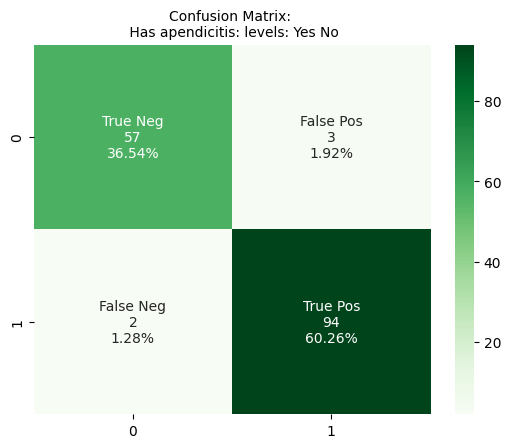

In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score

y_pred_train = best_rf.predict(X_train)
y_pred_test = best_rf.predict(X_test)


print("Train")
display(classification_metric(Y_train, y_pred_train))

print("Test:")

classifier_results["RandomForestClassifier"] = classification_metric(Y_test, y_pred_test)

display(classifier_results["RandomForestClassifier"])




display_confusion_matrix(Y_test, y_pred_test)

In [29]:
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_rf.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
                                             feature  importance
0                                                Age         NaN
1                                                BMI         NaN
2                                                Sex         NaN
3                                             Height         NaN
4                                             Weight         NaN
..                                               ...         ...
79                        Lymph_Nodes_Location_re_re         NaN
80  Lymph_Nodes_Location_rechter_nter_und_ittelbauch         NaN
81            Lymph_Nodes_Location_rechter_nterbauch         NaN
82                 Lymph_Nodes_Location_varialzysten         NaN
83              Lymph_Nodes_Location_ymphadenopathie         NaN

[84 rows x 2 columns]


## AdaBoostClassifier

In [30]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier


ada_clf = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # 'median', 'most_frequent', 'constant'
    ('classifier', AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=1),
        n_estimators=200,
        # algorithm="SAMME.R", 
        learning_rate=0.5))
])

param_dist = {
    # AdaBoost parameters
    'classifier__n_estimators': randint(50, 500),
    'classifier__learning_rate': uniform(0.01, 1.0),
    #'classifier__algorithm': ['SAMME'],

    # Estimator (DecisionTreeClassifier) params
    'classifier__estimator__max_depth': randint(1, 10),
    'classifier__estimator__min_samples_split': randint(2, 20),
    'classifier__estimator__min_samples_leaf': randint(1, 10),
    'classifier__estimator__criterion': ['gini', 'entropy'],
    
    # Imputer parameters
    'imputer__strategy': ['mean', 'median', 'most_frequent']
}


random_search = RandomizedSearchCV(
    estimator=ada_clf,
    param_distributions=param_dist,
    n_iter=N_ITER, 
    cv=CV,
    scoring=SCORING,  # 'f1', 'precision', 'recall'
    n_jobs=-1,
    # verbose=2,
    random_state=42,
    return_train_score=True
)


random_search.fit(X_train, Y_train)

print("Best parameters found:")
print(random_search.best_params_)
print(f"\nBest cross-validation score: {random_search.best_score_:.3f}")

# Get the best model
ada_clf = random_search.best_estimator_


#ada_clf.fit(X_train, Y_train)

/home/sergiocarcamo/dev/ml2-project/.venv/lib64/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/sergiocarcamo/dev/ml2-project/.venv/lib64/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/sergiocarcamo/dev/ml2-project/.venv/lib64/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/sergiocarcamo/dev/ml2-project/.venv/lib64/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is 

Best parameters found:
{'classifier__estimator__criterion': 'gini', 'classifier__estimator__max_depth': 4, 'classifier__estimator__min_samples_leaf': 8, 'classifier__estimator__min_samples_split': 8, 'classifier__learning_rate': 0.45583275285359115, 'classifier__n_estimators': 264, 'imputer__strategy': 'most_frequent'}

Best cross-validation score: 0.940


Train


,accuracy,precision,recall,ROC,F1
0,1.0,1.0,1.0,1.0,1.0


Test:


,accuracy,precision,recall,ROC,F1
0,0.935897,0.977778,0.916667,0.941667,0.946237


,accuracy,precision,recall,ROC,F1
0,0.935897,0.977778,0.916667,0.941667,0.946237


Sum of TP + TN + FP + FN =  88 + 58 + 2 + 8  = 156
True


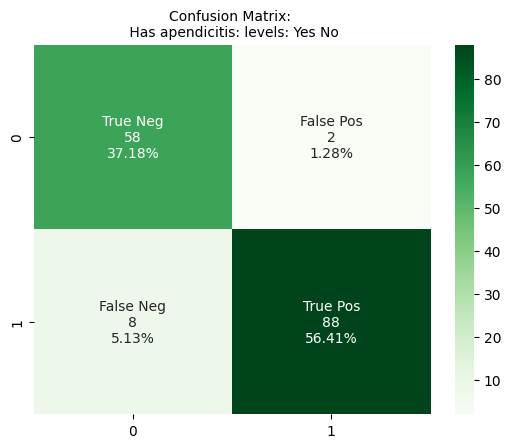

In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score

y_pred_train = ada_clf.predict(X_train)
y_pred_test = ada_clf.predict(X_test)


print("Train")
display(classification_metric(Y_train, y_pred_train))

print("Test:")

classifier_results["AdaBoostClassifier"] = classification_metric(Y_test, y_pred_test)

display(classifier_results["AdaBoostClassifier"])

display(classification_metric(Y_test, y_pred_test))


display_confusion_matrix(Y_test, y_pred_test)

## XGBClassifier

In [32]:
import xgboost as xgb
from scipy.stats import randint, uniform
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.impute import SimpleImputer


param_dist = {
    'classifier__n_estimators': randint(100, 1000),
    'classifier__max_depth': randint(3, 12),
    'classifier__learning_rate': uniform(0.01, 0.3),
    'classifier__subsample': uniform(0.6, 0.4),
    'classifier__colsample_bytree': uniform(0.6, 0.4),
    'classifier__min_child_weight': randint(1, 7),
    'classifier__gamma': uniform(0, 0.5),
    'classifier__reg_alpha': [0, 0.1, 0.5, 1.0],
    'classifier__reg_lambda': [0.1, 0.5, 1.0, 5.0],
    'classifier__scale_pos_weight': [1, 3, 5],
    
    # Imputer parameters
    'imputer__strategy': ['mean', 'median', 'most_frequent']
}


xgb_clf = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', xgb.XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss', 
        enable_categorical=True,
        seed=42))
])


random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=N_ITER, 
    cv=CV,
    scoring=SCORING,  # 'f1', 'precision', 'recall'
    n_jobs=-1,
    # verbose=2,
    random_state=42,
    return_train_score=True,
    error_score='raise'
)


random_search.fit(X_train, Y_train)

print("Best parameters found:")
print(random_search.best_params_)
print(f"\nBest cross-validation score: {random_search.best_score_:.3f}")

# Get the best model
xbg_1 = random_search.best_estimator_


#ada_clf.fit(X_train, Y_train)
#xbg_1 = xgb.XGBClassifier(objective = "binary:logistic", seed=42, max_depth=5)
#xbg_1.fit(X_train, Y_train)

Best parameters found:
{'classifier__colsample_bytree': 0.749816047538945, 'classifier__gamma': 0.4753571532049581, 'classifier__learning_rate': 0.22959818254342154, 'classifier__max_depth': 7, 'classifier__min_child_weight': 2, 'classifier__n_estimators': 566, 'classifier__reg_alpha': 0.5, 'classifier__reg_lambda': 1.0, 'classifier__scale_pos_weight': 5, 'classifier__subsample': 0.9464704583099741, 'imputer__strategy': 'most_frequent'}

Best cross-validation score: 0.951


In [33]:
import sklearn
import numpy as np
import xgboost

print("scikit-learn version:", sklearn.__version__)
print("XGBoost version:", xgboost.__version__)
print("NumPy version:", np.__version__)


scikit-learn version: 1.4.0
XGBoost version: 2.0.2
NumPy version: 1.26.4


Train


,accuracy,precision,recall,ROC,F1
0,0.996795,0.99458,1.0,0.996109,0.997283


Test:


,accuracy,precision,recall,ROC,F1
0,0.955128,0.958763,0.96875,0.951042,0.963731


Sum of TP + TN + FP + FN =  93 + 56 + 4 + 3  = 156
True


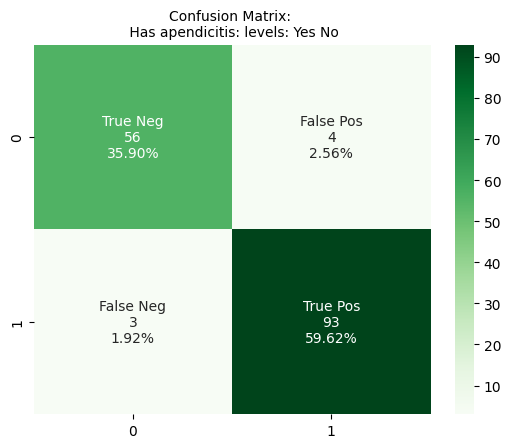

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score

y_pred_train = xbg_1.predict(X_train)
y_pred_test = xbg_1.predict(X_test)


print("Train")
display(classification_metric(Y_train, y_pred_train))

print("Test:")

classifier_results["XGBClassifier"] = classification_metric(Y_test, y_pred_test)

display(classifier_results["XGBClassifier"])

display_confusion_matrix(Y_test, y_pred_test)


In [35]:
combined_results = pd.concat(
    {model: df.T for model, df in classifier_results.items()}, 
    axis=1
)

combined_results.columns = combined_results.columns.droplevel(1) 

#sns.heatmap(combined_results, annot=True)


combined_results

,RandomForestClassifier,AdaBoostClassifier,XGBClassifier
accuracy,0.967949,0.935897,0.955128
precision,0.969072,0.977778,0.958763
recall,0.979167,0.916667,0.968750
ROC,0.964583,0.941667,0.951042
F1,0.974093,0.946237,0.963731


# Summary 

Chosen model is AdaBoost Classifier (with Decision Tree Classifier as base estimator)

TODO:
Find variables that can be removed without sacrificing performance (such as ultrasound images)

Improve imputation methods
